# Statistical analysis of aggregate data

Imports

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from scipy.io import loadmat
import json
import jsonpickle as pickle

In [2]:
import sys
import os
current_dir = os.path.abspath('')
os.chdir(current_dir)
sys.path.append(os.path.join(current_dir,'..','code','BalancingControl'))

import two_stage_utils as tu
import inference as inf

torch threads 1
Running on device cpu


Set global variables and propertes

In [3]:
raw_data_fname_str = ""
raw_data_folder = "raw_data"
choice_data_folder = os.path.join(raw_data_folder, "choices")
questionnaire_data_folder = os.path.join(raw_data_folder, "questionnaires")

results_folder = os.path.join("results")
processed_data_folder = os.path.join("processed_data")

sorted_data_fname = "sorted_data.csv"
sorted_data_file = os.path.join(processed_data_folder, sorted_data_fname)

plot_df_fname = "plot_df_data.csv"
plot_data_file = os.path.join(processed_data_folder, plot_df_fname)

second_level_fname = "second_level_data.csv"
second_level_file = os.path.join(processed_data_folder, second_level_fname)

mask_file_name = "mask.txt"
mask_file = os.path.join(processed_data_folder, mask_file_name)

Rho_fname = "Rho.pkl"
Rho_file = os.path.join(processed_data_folder, Rho_fname)

agent_data_fname = "data_formatted_for_agent.pkl"
agent_data_file = os.path.join(processed_data_folder, agent_data_fname)

statistics_folder = os.path.join(results_folder, "statistics")

scores_fname = "mf_mb_scores.csv"
scores_file = os.path.join(statistics_folder, scores_fname)

### read summary data

In [4]:
second_level_df = pd.read_csv(second_level_file)

In [5]:
second_level_df

,Unnamed: 0,subject,rewarded,common,stayed
0,0,0.0,rewarded,common,0.971831
1,1,0.0,unrewarded,common,0.385714
2,2,0.0,rewarded,rare,0.233333
3,3,0.0,unrewarded,rare,0.900000
4,0,1.0,rewarded,common,0.420290
...,...,...,...,...,...
91,3,22.0,unrewarded,rare,0.857143
92,0,23.0,rewarded,common,0.908046
93,1,23.0,unrewarded,common,0.577778
94,2,23.0,rewarded,rare,0.769231


In [6]:
summary_dict = {}

summary_dict["rewarded common"] = second_level_df[second_level_df["rewarded"]=="rewarded"][second_level_df["common"]=="common"]["stayed"].values
summary_dict["rewarded rare"] = second_level_df[second_level_df["rewarded"]=="rewarded"][second_level_df["common"]=="rare"]["stayed"].values
summary_dict["unrewarded common"] = second_level_df[second_level_df["rewarded"]=="unrewarded"][second_level_df["common"]=="common"]["stayed"].values
summary_dict["unrewarded rare"] = second_level_df[second_level_df["rewarded"]=="unrewarded"][second_level_df["common"]=="rare"]["stayed"].values

summary_stayed_arr = [summary_dict["rewarded common"], summary_dict["rewarded rare"], summary_dict["unrewarded common"], summary_dict["unrewarded rare"]]

/tmp/ipykernel_15317/904387823.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  summary_dict["rewarded common"] = second_level_df[second_level_df["rewarded"]=="rewarded"][second_level_df["common"]=="common"]["stayed"].values
/tmp/ipykernel_15317/904387823.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  summary_dict["rewarded rare"] = second_level_df[second_level_df["rewarded"]=="rewarded"][second_level_df["common"]=="rare"]["stayed"].values
/tmp/ipykernel_15317/904387823.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  summary_dict["unrewarded common"] = second_level_df[second_level_df["rewarded"]=="unrewarded"][second_level_df["common"]=="common"]["stayed"].values
/tmp/ipykernel_15317/904387823.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  summary_dict["unrewarded rare"] = second_level_df[second_level_df["rewarded"]=="unrewarded"][second_level

### plot repetitions of first stage actions

/home/sarah/anaconda3/envs/two_stage/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/sarah/anaconda3/envs/two_stage/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


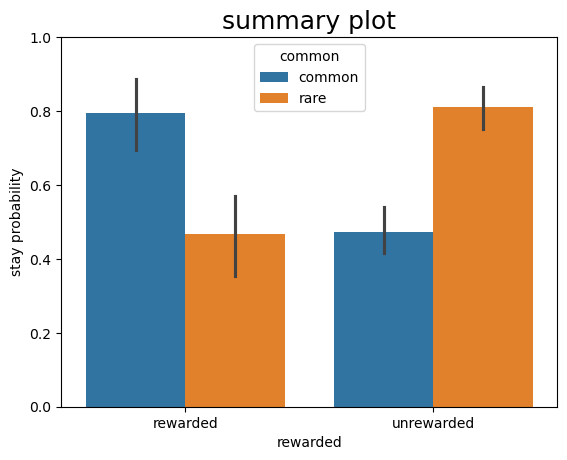

In [7]:
plt.figure()
g = sns.barplot(data=second_level_df, x="rewarded", y="stayed", hue="common", order=["rewarded", "unrewarded"])
#g.set_xticklabels(names, rotation=45, horizontalalignment='right', fontsize=16)
plt.ylim([0,1])
# plt.yticks(np.arange(0,1.1,0.2),fontsize=16)
plt.title("summary plot", fontsize=18)
plt.savefig(os.path.join(statistics_folder, "behavior_summary_second_level_df.svg"),dpi=300)
plt.ylabel("stay probability")
plt.show()

### calculate and plot scores

/home/sarah/anaconda3/envs/two_stage/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/sarah/anaconda3/envs/two_stage/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


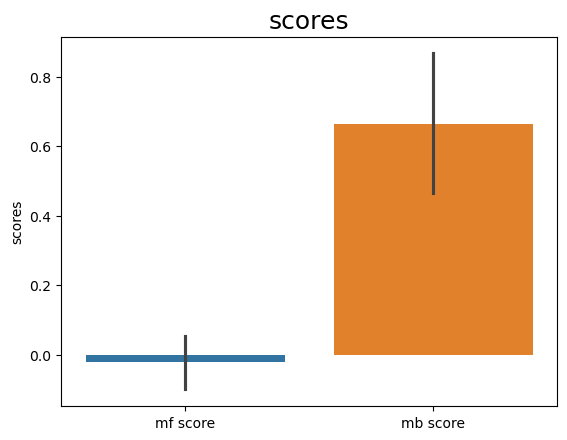

<Figure size 640x480 with 0 Axes>

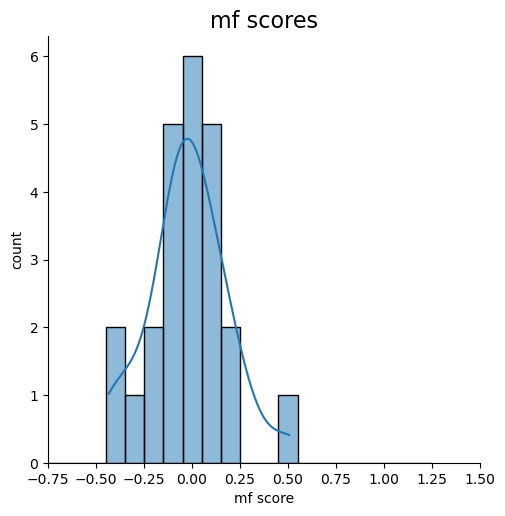

<Figure size 640x480 with 0 Axes>

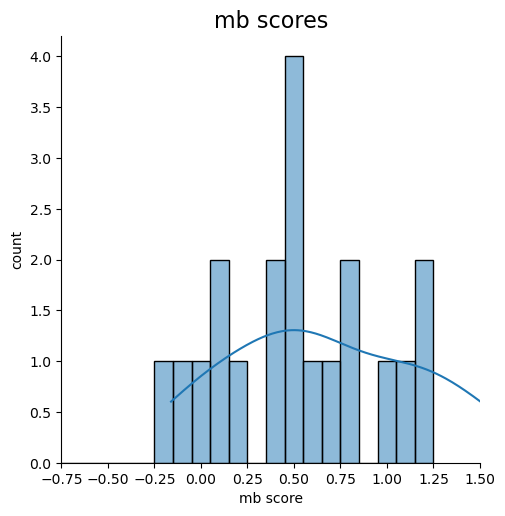

In [8]:
mf_score = summary_stayed_arr[0] + summary_stayed_arr[1] - summary_stayed_arr[2] - summary_stayed_arr[3]

mb_score = summary_stayed_arr[0] - summary_stayed_arr[1] - summary_stayed_arr[2] + summary_stayed_arr[3]

scores = pd.DataFrame({'mf score': mf_score, 'mb score': mb_score})

plt.figure()
g = sns.barplot(data=scores)
#plt.ylim([0,0.5])
# plt.yticks(np.arange(0,1.1,0.2),fontsize=16)
plt.title("scores", fontsize=18)
plt.savefig(os.path.join(statistics_folder, "behavior_scores.svg"),dpi=300)
plt.ylabel("scores")
plt.show()

plt.figure()
sns.displot(data=scores, x="mf score", kde=True, binrange=[-0.75,1.25], bins=20)
plt.xlim([-0.75,1.5])
#plt.ylim([0,0.5])
# plt.yticks(np.arange(0,1.1,0.2),fontsize=16)
plt.title("mf scores", fontsize=16)
plt.savefig(os.path.join(statistics_folder, "mf_scores.svg"),dpi=300)
plt.ylabel("count")
plt.show()

plt.figure()
sns.displot(data=scores, x="mb score", kde=True, binrange=[-0.75,1.25], bins=20)
plt.xlim([-0.75,1.5])
# plt.yticks(np.arange(0,1.1,0.2),fontsize=16)
plt.title("mb scores", fontsize=16)
plt.savefig(os.path.join(statistics_folder, "mb_scores.svg"),dpi=300)
plt.ylabel("count")
plt.show()

### check for relations between scores

In [9]:
#plt.figure()
#sns.jointplot(data=scores, x="mf score", y="mb score")
#plt.show()

<Figure size 640x480 with 0 Axes>

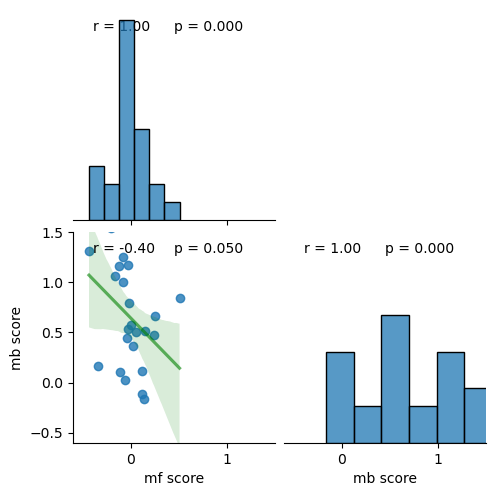

In [10]:
plt.figure()
vars_of_interest = ["mf score", "mb score"]
f = sns.pairplot(data=scores, kind='reg', diag_kind="hist", corner=True,
                    plot_kws={'line_kws': {'color': 'green', 'alpha': 0.6}},
                    vars=vars_of_interest)
f.map(tu.annot_corrfunc)
f.axes[1,0].set_xlim([-0.6, 1.5])
f.axes[1,0].set_ylim([-0.6, 1.5])
f.axes[1,1].set_xlim([-0.6, 1.5])
plt.savefig(os.path.join(statistics_folder, "scores.svg"))
plt.show()

### save scores to file

In [11]:
scores.to_csv(scores_file)